In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def plot_learning_curves(label, title, *data, save_plot=False):
    
    fig = plt.figure(figsize=(12, 4)) 
    
    plt.subplot(1,2,1)   
    for ds in data:
        plt.plot(ds['accuracy'])
    plt.title('{} - accuracy'.format(title))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(label, loc='upper left')
    plt.grid(True)

    plt.subplot(1,2,2)
    for ds in data:
        plt.plot(ds['loss'])
    plt.title('{} - loss'.format(title))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(label, loc='upper left')
    plt.grid(True)

    plt.tight_layout()
    if save_plot:
        plt.savefig('visualization/{}.png'.format(title))
    plt.show()

## Jazz

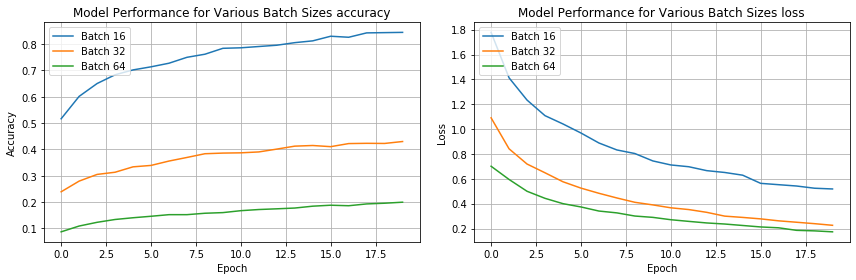

In [20]:
ds1 = pd.read_csv('logs/log_16.csv')
ds2 = pd.read_csv('logs/log_32.csv')
ds3 = pd.read_csv('logs/log_64.csv')

labels = ['Batch 16', 'Batch 32', 'Batch 64']
title = 'Model Performance for Various Batch Sizes'

plot_learning_curves(labels, title, ds1, ds2, ds3)

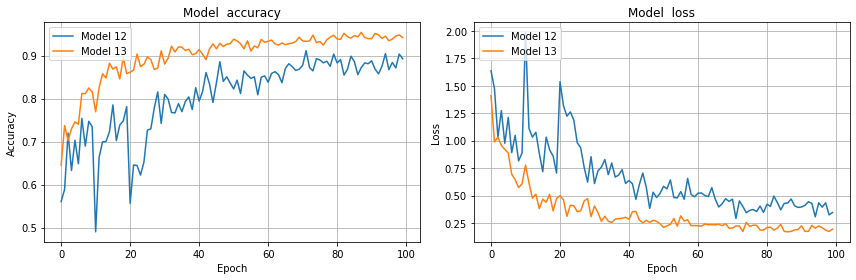

In [18]:
ds1 = pd.read_csv('logs/jazz_100_16_logs.csv')
ds2 = pd.read_csv('logs/jazz_opt2_80_16_logs.csv')

labels = ['Model 12', 'Model 13']
title = 'Model '

plot_learning_curves(labels, title, ds1[:100], ds2[:100])

In [11]:
from music21 import converter, corpus, instrument, midi, note, chord, pitch, volume

def open_midi(midi_path, remove_drums=False):
    # There is an one-line method to read MIDIs
    # but to remove the drums we need to manipulate some
    # low level MIDI events.
    mf = midi.MidiFile()
    mf.open(midi_path)
    mf.read()
    mf.close()
    if (remove_drums):
        for i in range(len(mf.tracks)):
            mf.tracks[i].events = [ev for ev in mf.tracks[i].events if ev.channel != 10]          

    return midi.translate.midiFileToStream(mf)
    
base_midi = open_midi('/home/dadmaan/Desktop/jc_5.mid')
base_midi

<music21.stream.Score 0x7f39f57e62d0>

In [17]:
c = chord.Chord(['c3', 'g#4', 'b5'])

c.volume = volume.Volume(velocity=90)

c.volume.velocityIsRelative = False

eventList = midi.translate.chordToMidiEvents(c)

eventList

[<MidiEvent DeltaTime, t=0, track=None, channel=None>,
 <MidiEvent NOTE_ON, t=None, track=None, channel=1, pitch=48, velocity=90>,
 <MidiEvent DeltaTime, t=0, track=None, channel=None>,
 <MidiEvent NOTE_ON, t=None, track=None, channel=1, pitch=68, velocity=90>,
 <MidiEvent DeltaTime, t=0, track=None, channel=None>,
 <MidiEvent NOTE_ON, t=None, track=None, channel=1, pitch=83, velocity=90>,
 <MidiEvent DeltaTime, t=1024, track=None, channel=None>,
 <MidiEvent NOTE_OFF, t=None, track=None, channel=1, pitch=48, velocity=0>,
 <MidiEvent DeltaTime, t=0, track=None, channel=None>,
 <MidiEvent NOTE_OFF, t=None, track=None, channel=1, pitch=68, velocity=0>,
 <MidiEvent DeltaTime, t=0, track=None, channel=None>,
 <MidiEvent NOTE_OFF, t=None, track=None, channel=1, pitch=83, velocity=0>]

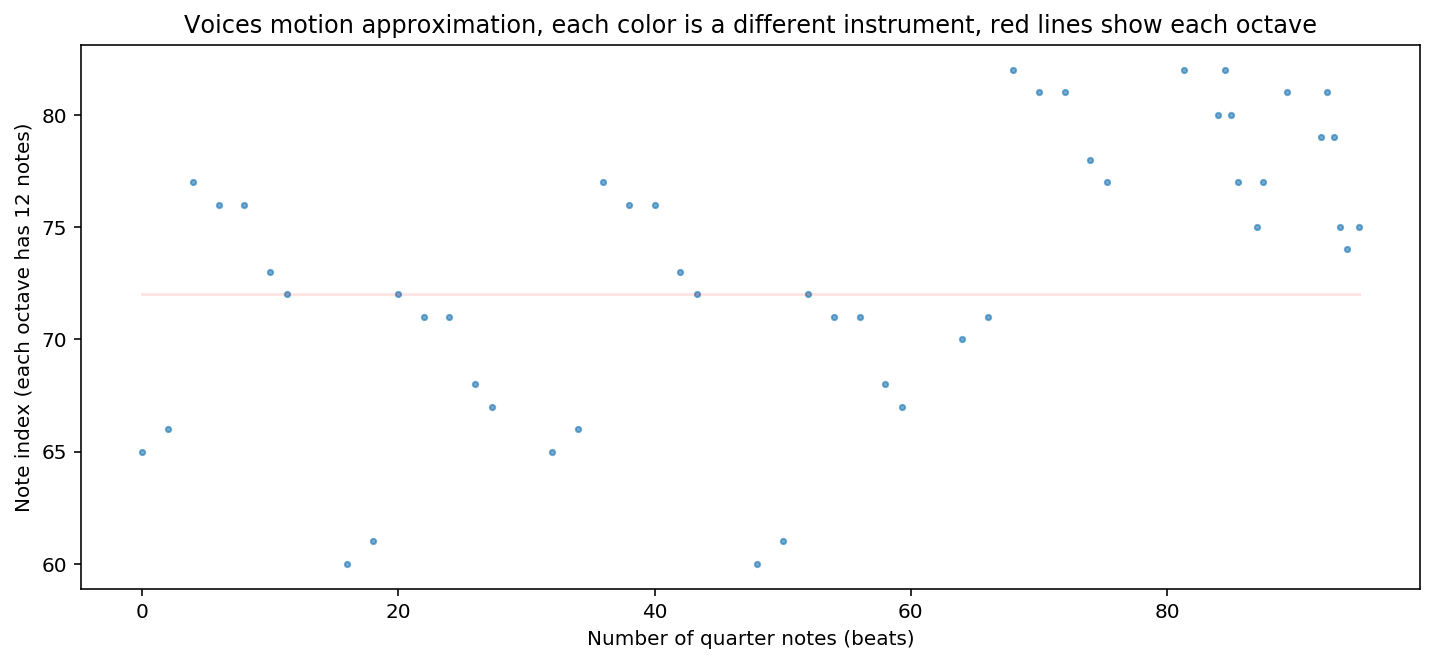

{0.0} <music21.stream.Measure 1 offset=0.0>
    {0.0} <music21.clef.TrebleClef>
    {0.0} <music21.tempo.MetronomeMark Quarter=200.0>
    {0.0} <music21.key.Key of c minor>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.chord.Chord F4>
    {2.0} <music21.chord.Chord F#4>


In [8]:
from music21 import stream

temp_midi_chords = open_midi(
    '/home/dadmaan/Desktop/jc_5.mid').chordify()
temp_midi = stream.Score()
temp_midi.insert(0, temp_midi_chords)

# Printing merged tracks.
print_parts_countour(temp_midi)

# Dumping first measure notes
temp_midi_chords.measures(0, 1).show("text")




   <MidiEvent DeltaTime, t=0, track=None, channel=None>,
   <MidiEvent NOTE_ON, t=None, track=None, channel=1, pitch=48, velocity=90>,
   <MidiEvent DeltaTime, t=0, track=None, channel=None>,
   <MidiEvent NOTE_ON, t=None, track=None, channel=1, pitch=68, velocity=90>,
   <MidiEvent DeltaTime, t=0, track=None, channel=None>,
   <MidiEvent NOTE_ON, t=None, track=None, channel=1, pitch=83, velocity=90>,
   <MidiEvent DeltaTime, t=1024, track=None, channel=None>,
   <MidiEvent NOTE_OFF, t=None, track=None, channel=1, pitch=48, velocity=0>,
   <MidiEvent DeltaTime, t=0, track=None, channel=None>,
   <MidiEvent NOTE_OFF, t=None, track=None, channel=1, pitch=68, velocity=0>,
   <MidiEvent DeltaTime, t=0, track=None, channel=None>,
   <MidiEvent NOTE_OFF, t=None, track=None, channel=1, pitch=83, velocity=0>

